<a href="https://colab.research.google.com/github/Akashkadam1361/Machine_learning_practice/blob/main/MLP_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Excellent wine company wants to develop ML model for predicting wine
quality on certain physiochemical characteristics in order to replace
expensive quality sensor

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(data_url, sep=';')

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
feature_list = data.columns[:-1].values
Label = [data.columns[-1]]
print('Feature List:',feature_list)
print('Label:',Label)

Feature List: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Count')

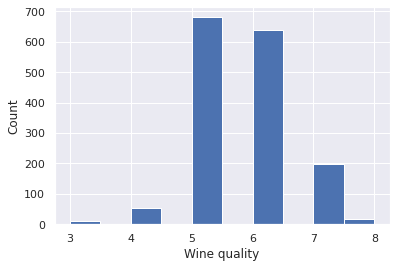

In [ ]:
sns.set()
data.quality.hist()
plt.xlabel('Wine quality')
plt.ylabel('Count')

# **Split Train Test Data**

In [ ]:
def split_train_test(data,test_ratio):
  # set the random seed.
  np.random.seed(42)
  # shuffle the dataset.
  shuffled_indices = np.random.permutation(len(data))
  # calculate the size of the test set.
  test_set_size = int(len(data) * test_ratio)
  # split dataset to get training and test sets.
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set,test_set = split_train_test(data,test_ratio=0.2)

In [ ]:
from sklearn.model_selection import train_test_split
train_set , test_split = train_test_split(data, test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data['quality']):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]


In [ ]:
strat_dist = strat_test_set["quality"].value_counts() / len(strat_test_set)
overall_dist = data["quality"].value_counts() / len(data)
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']

In [ ]:
dist_comparison

,overall,stratified,diff(s-o)
5,0.425891,0.425000,-0.000891
6,0.398999,0.400000,0.001001
7,0.124453,0.125000,0.000547
4,0.033146,0.034375,0.001229
8,0.011257,0.009375,-0.001882
3,0.006254,0.006250,-0.000004


In [ ]:
random_dist = test_set["quality"].value_counts() / len(test_set)
random_dist

6    0.413793
5    0.407524
7    0.131661
4    0.028213
8    0.015674
3    0.003135
Name: quality, dtype: float64

In [ ]:
dist_comparison.loc[:, ['diff(s-o)_pct', 'diff(r-o)_pct']]

# Data Visualization

In [ ]:
exploration_set = strat_train_set.copy()

# Scatter Visualization
With seaborn library:


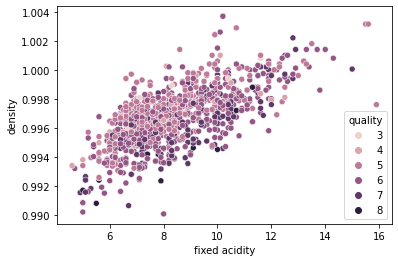

In [ ]:
sns.scatterplot(x='fixed acidity',y='density',hue='quality',data=exploration_set)

With matplotlib:

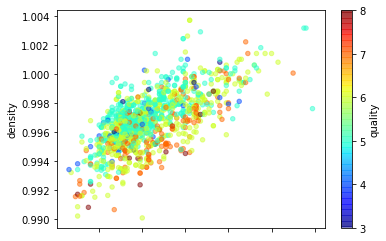

In [ ]:
exploration_set.plot(kind='scatter',x='fixed acidity',y='density',alpha=0.5,c='quality',cmap=plt.get_cmap('jet'))

Let's calculate correlations between our features.


In [ ]:
corr_matrix = exploration_set.corr()

In [ ]:
corr_matrix['quality']

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

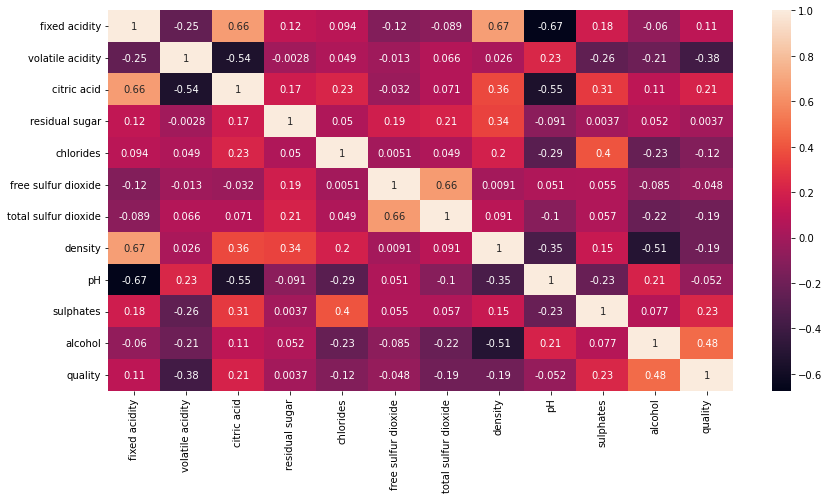

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd3c464d50>,
      dtype=object)

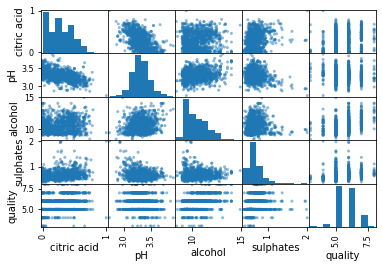

In [ ]:
from pandas.plotting import scatter_matrix
attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
scatter_matrix(exploration_set[attribute_list])

# Prepare data for ML algorithm

Separate features and labels from the training set.


In [ ]:
# Copy all features leaving aside the label.
wine_features = strat_train_set.drop('quality',axis=1)

# copy of the lebel list
wine_labels = strat_train_set['quality'].copy()



Data cleaning

In [ ]:
wine_features.isna().sum()
# counts the number of NaN in each column of wine_feature

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

It provides SimpleImputer class for filling up missing values with. say, median value.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

The strategy contains instructions as how to replace the missing values. In this case,
we specify that the missing value should be replaced by the median value.

In [ ]:
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In case, the features contains non-numeric attributes, they need to be dropped before
calling the fit method on imputer object.


In [ ]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

Note that these are median values for each feature. We can cross-check it by calculating
median on the feature set:

In [ ]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

Finally we use the trained imputer to transform the training set such that the missing
values are replaced by the medians:


In [ ]:
tr_features = imputer.transform(wine_features)

In [ ]:
tr_features.shape

(1279, 11)

In [ ]:
wine_features_tr = pd.DataFrame(tr_features, columns=wine_features.columns)

**Handling text and categorical**

 Converting categories to numbers

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

* Call fit_transform() method on ordinal_encoder object to convert text to numbers.
* The list of categories can be obtained via categories_ instance variable.

One issue with this representation is that the ML algorithm would assume that the
two nearby values are closer than the distinct ones.

**Using one hot encoding**
* Here we create one binary feature per category - the feature value is 1 when the category is present else it is 0.
* Only one feature is 1 (hot) and the rest are 0 (cold).
* The new features are referred to as dummy features.
* Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

**Transformation Pipelinet**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
transform_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),('std_scalar',StandardScaler()),])
wine_features_tr = transform_pipeline.fit_transform(wine_features)

**How to transform mixed features?**

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(wine_features)
cat_attribs = ["place_of_manufacturing"]
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", OneHotEncoder(), cat_attribs),])
wine_features_tr = full_pipeline.fit_transform(wine_features)

NameError: ignored

# Select and train ML mode

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

* For regression models, we use mean squared error as an evaluation measure.

In [ ]:
from sklearn.metrics import mean_squared_error
quality_predictions = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions) 

0.4206571060060277

Let's evaluate performance on the test set.
* We need to first apply transformation on the test set and then apply the model prediction
function.

In [ ]:
# copy all features leaving aside the label.
wine_features_test = strat_test_set.drop("quality", axis=1)
# copy the label list
wine_labels_test = strat_test_set['quality'].copy()
# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)
# call predict function and calculate MSE.
quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)


0.3975913087501518

Let's visualize the error between the actual and predicted values.

Text(0, 0.5, 'Predicted quality')

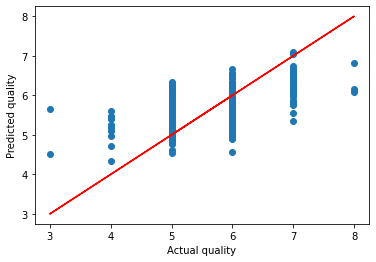

In [ ]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

Let's try another model: DecisionTreeRegressor.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr,wine_labels)

DecisionTreeRegressor()

In [ ]:
quality_predictions = tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels,quality_predictions)

0.0

In [ ]:
quality_test_predictions = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test,quality_test_predictions)

0.590625

Note that the training error is 0, while the test error is 0.58. This is an example of an
overfitted model.

Text(0, 0.5, 'Predicted quality')

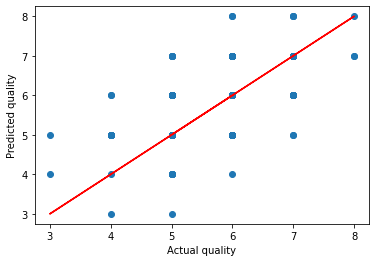

In [ ]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

We can use cross-validation (CV) for robust evaluation of model performance.

Linear Regression CV

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [ ]:
scores = cross_val_score(lin_reg, wine_features_tr, wine_labels,scoring="neg_mean_squared_error", cv=10)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores: [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean: 0.431639217212196
Standard deviation: 0.0835635973041397


Decision tree CV

In [ ]:
scores = cross_val_score(tree_reg, wine_features_tr, wine_labels,scoring="neg_mean_squared_error", cv=10)
tree_mse_scores = -scores
display_scores(tree_mse_scores)

Scores: [0.625      0.703125   0.640625   0.5390625  0.515625   0.6328125
 0.6640625  0.6796875  0.921875   1.03149606]
Mean: 0.6953371062992126
Standard deviation: 0.1530275031252981


**Random forest CV**
* Random forest model builds multiple decision trees on randomly selected features
and then average their predictions.
* Building a model on top of other model is called ensemble learning, which is often
used to improve performance of ML models.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr, wine_labels)
scores = cross_val_score(forest_reg, wine_features_tr, wine_labels,scoring="neg_mean_squared_error", cv=10)
forest_mse_scores = -scores
display_scores(forest_mse_scores)

Scores: [0.37987578 0.41918359 0.29241172 0.31497656 0.21733203 0.28919766
 0.28685    0.39542578 0.43593047 0.46552913]
Mean: 0.34967127276082677
Standard deviation: 0.07635513598618231


In [ ]:
quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.335561875

Text(0, 0.5, 'Predicted quality')

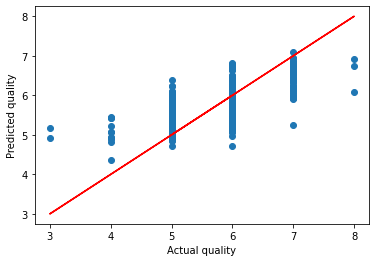

In [ ]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')


#  Finetune your model
* Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV


* We need to specify a list of hyperparameters along with the range of values to try.
*It automatically evaluates all possible combinations of hyperparameter values using cross-validation.

For example, there are number of hyperparameters in RandomForest regression
such as:
* Number of estimators
* Maximum number of features

In [ ]:
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]


Here the parameter grid contains two combinations:
1. The first combination contains n_estimators with 3 values and max_features with
4 values.
2. The second combination has an additional bootstrap parameter, which is set to
False. Note that it was set to its default value, which is True, in the first grid.

Let's create an object of GridSearchCV:

In [ ]:
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

* In this case, we set cv=5 i.e. using 5 fold cross validation for training the model.
* We need to train the model for 18 parameter combinations and each combination
would be trained 5 times as we are using cross-validation here.
* The total model training runs = 18 × 5 = 90

In [ ]:
grid_search.fit(wine_features_tr, wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best parameter combination can be obtained as follows:

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

Let's find out the error at different parameter settings:

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
 print(-mean_score, params)

0.47400360838779954 {'max_features': 2, 'n_estimators': 3}
0.3820695159313725 {'max_features': 2, 'n_estimators': 10}
0.36259332107843134 {'max_features': 2, 'n_estimators': 30}
0.46351000816993454 {'max_features': 4, 'n_estimators': 3}
0.3900516237745098 {'max_features': 4, 'n_estimators': 10}
0.36163882421023963 {'max_features': 4, 'n_estimators': 30}
0.4925548066448801 {'max_features': 6, 'n_estimators': 3}
0.3833276348039215 {'max_features': 6, 'n_estimators': 10}
0.3729384361383442 {'max_features': 6, 'n_estimators': 30}
0.4957536764705881 {'max_features': 8, 'n_estimators': 3}
0.36639129901960776 {'max_features': 8, 'n_estimators': 10}
0.35809586737472765 {'max_features': 8, 'n_estimators': 30}
0.49464937363834416 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.37981063112745095 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4790791802832244 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3852228860294117 {'bootstrap': False, 'max_features

As you can notice the lowest MSE is obtained for the best parameter combination.


Let's obtain the best estimator as follows:

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

**Note**: GridSearchCV is initialized with refit=True option, which retrains the best estimator on the full training set. This is likely to lead us to a better model as it is trained on a larger dataset.

**Randomized Search**
* When we have a large hyperparameter space, it is desirable to try
RandomizedSearchCV.
* It selects a random value for each hyperparameter at the start of each iteration and
repeats the process for the given number of random combinations.
* It enables us to search hyperparameter space with appropriate budget control

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

**Analysis of best model and its errors**
Analysis of the model provides useful insights about features. let's obtain the feature
importance as learnt by the model:

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [ ]:
sorted(zip(feature_importances, feature_list), reverse=True)

[(0.2650323840568773, 'alcohol'),
 (0.1355708194789965, 'sulphates'),
 (0.13370707994135286, 'volatile acidity'),
 (0.0800148156622445, 'total sulfur dioxide'),
 (0.06710539655667463, 'pH'),
 (0.05819567006557504, 'chlorides'),
 (0.05590705979503504, 'density'),
 (0.053083516566083316, 'fixed acidity'),
 (0.0527871546686973, 'residual sugar'),
 (0.0505414785834641, 'free sulfur dioxide'),
 (0.04805462462499959, 'citric acid')]

**Evaluation on test set**
Now that we have a reasonable model, we evaluate its performance on the test set. The
following steps are involved in the process:
1. Transform the test features.


In [ ]:
# copy all features leaving aside the label.
wine_features_test = strat_test_set.drop("quality", axis=1)
# copy the label list
wine_labels_test = strat_test_set['quality'].copy()
# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

2. Use the predict method with the trained model and the test set.

In [ ]:
quality_test_predictions = grid_search.best_estimator_.predict(
 wine_features_test_tr)

3. Compare the predicted labels with the actual ones and report the evaluation metrics.

In [ ]:
mean_squared_error(wine_labels_test, quality_test_predictions)


0.3385763888888889

4. It's a good idea to get 95% confidence interval of the evaluation metric. It can be
obtained by the following code:

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predictions - wine_labels_test) ** 2
stats.t.interval(confidence, len(squared_errors) - 1,
 loc=squared_errors.mean(),
 scale=stats.sem(squared_errors))

(0.277683591568205, 0.39946918620957284)